In [2]:
import pandas as pd

df = pd.read_excel('/Users/AnirbanGuha/Library/CloudStorage/OneDrive-Personal/Udemy Courses/Data Science - data Prep and EDA with Python/Data+Science+in+Python+-+Data+Prep+%26+EDA/Data/Alarm Survey Data.xlsx')

In [3]:
df.sleep_quality.value_counts(dropna=False)

sleep_quality
5.0    2721
4.0    2261
3.0     997
NaN     351
1.0     103
Name: count, dtype: int64

In [4]:
df.fillna({'sleep_quality':2},inplace=True)

In [5]:
df.sleep_quality.value_counts(dropna=False)

sleep_quality
5.0    2721
4.0    2261
3.0     997
2.0     351
1.0     103
Name: count, dtype: int64

In [6]:
df.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5 stars
1,2,31,3.0,light,3.0,3,3 stars
2,3,18,0.0,light_activity,4.0,1,1 stars
3,4,42,4.0,active,4.0,1,4 stars
4,5,30,1.0,light_activity,1.0,4,3 stars


In [7]:
df.describe(include='number')

,survey_id,age,number_of_children,sleep_quality,number_of_snoozes
count,6433.000000,6433.000000,6433.000000,6433.000000,6433.000000
mean,3216.302192,29.069175,1.395616,4.110835,1.145811
std,1856.007409,7.472048,1.432192,0.963415,1.599481
min,1.000000,13.000000,0.000000,1.000000,0.000000
25%,1609.000000,23.000000,0.000000,4.000000,0.000000
50%,3217.000000,28.000000,1.000000,4.000000,0.000000
75%,4825.000000,34.000000,2.000000,5.000000,2.000000
max,6366.000000,47.000000,5.500000,5.000000,19.000000


In [8]:
df['number_of_children'].value_counts()

number_of_children
0.0    2440
2.0    1498
1.0    1172
3.0     788
4.0     331
5.5     204
Name: count, dtype: int64

In [9]:
df.activity_level.value_counts()

activity_level
active            2450
lightly active    2289
light_activity     691
very active        669
light              334
Name: count, dtype: int64

In [10]:
import numpy as np

In [11]:
df.activity_level = np.where(df.activity_level.isin(['light_activity','light']),'lightly active',df.activity_level)

In [12]:
df[df.duplicated(keep=False)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
6299,6300,31,2.0,active,5.0,0,3 stars
6300,6301,27,2.0,lightly active,4.0,0,2 stars
6301,6302,41,3.0,lightly active,5.0,0,2 stars
6302,6303,25,0.0,lightly active,5.0,0,5 stars
6303,6304,25,1.0,lightly active,5.0,0,2 stars
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5 stars
6429,6363,31,1.0,lightly active,4.0,0,4 stars
6430,6364,26,0.0,lightly active,5.0,0,3 stars
6431,6365,27,1.0,active,5.0,0,3 stars


In [13]:
df = df[~df.duplicated()]

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
import seaborn as sns

<Axes: xlabel='number_of_children'>

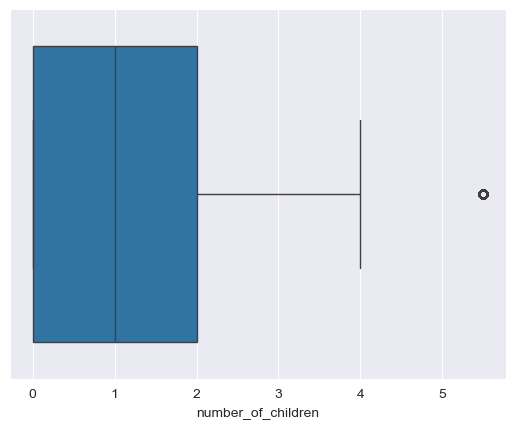

In [16]:
sns.boxplot(df,x='number_of_children')

In [17]:
q25, q50, q75 =  np.percentile(df.number_of_children, (25,50,75))
print(f'q25={q25}, median={q50}, q75={q75}')

q25=0.0, median=1.0, q75=2.0


In [18]:
iqr = q75 - q25

In [19]:
min_range = q25 - 1.5 * iqr
max_range = q75 + 1.5 * iqr

In [20]:
df[(df.number_of_children < min_range) | (df.number_of_children > max_range)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
6,7,41,5.5,lightly active,1.0,1,2 stars
7,8,36,5.5,lightly active,1.0,1,2 stars
12,13,34,5.5,lightly active,3.0,1,2 stars
17,18,41,5.5,very active,1.0,1,3 stars
21,22,40,5.5,lightly active,3.0,2,4 stars
...,...,...,...,...,...,...,...
6041,6042,28,5.5,active,4.0,0,2 stars
6043,6044,34,5.5,active,5.0,0,3 stars
6132,6133,47,5.5,lightly active,4.0,0,2 stars
6296,6297,45,5.5,active,5.0,0,3 stars


In [21]:
df[df.duplicated()]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


array([[<Axes: title={'center': 'survey_id'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'number_of_children'}>,
        <Axes: title={'center': 'sleep_quality'}>],
       [<Axes: title={'center': 'number_of_snoozes'}>, <Axes: >]],
      dtype=object)

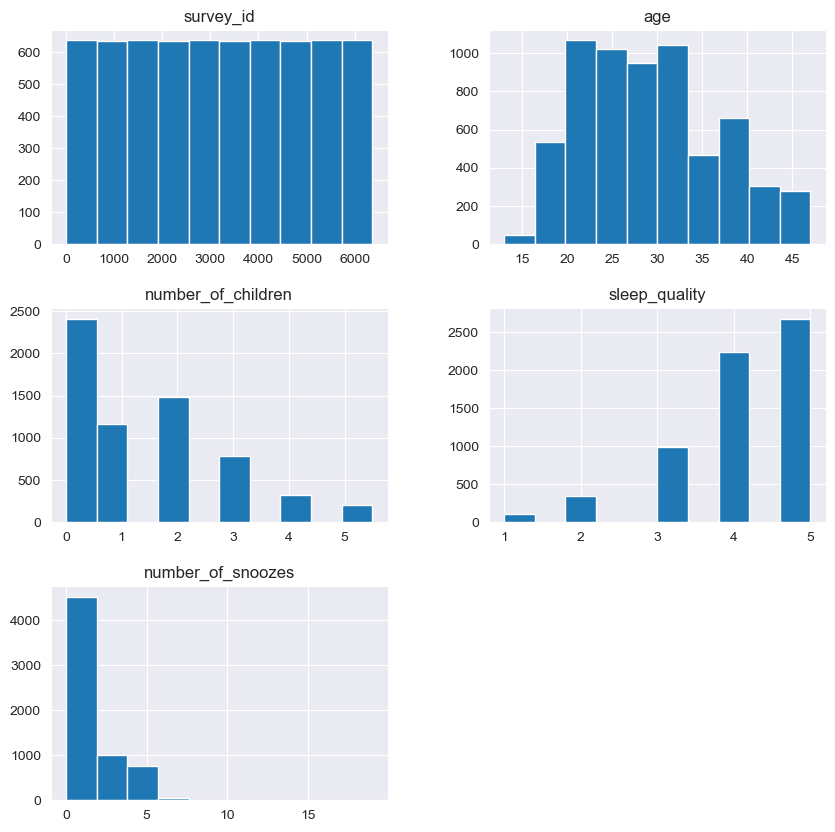

In [22]:
df.hist(figsize=(10,10))

<Axes: xlabel='number_of_snoozes', ylabel='Count'>

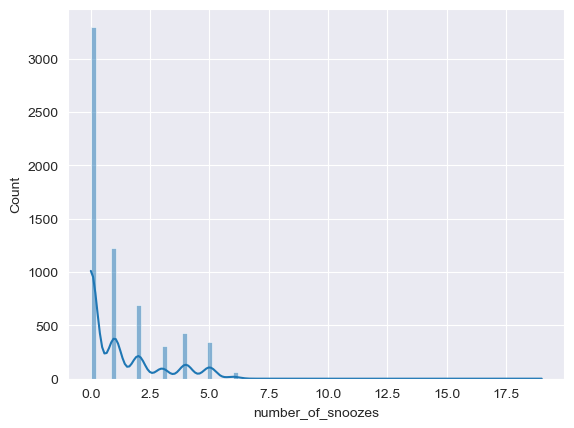

In [23]:
sns.histplot(df,x='number_of_snoozes',kde=True)

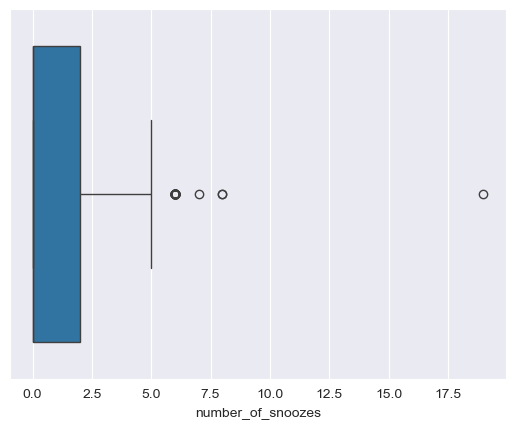

In [24]:
sns.boxplot(df,x='number_of_snoozes');

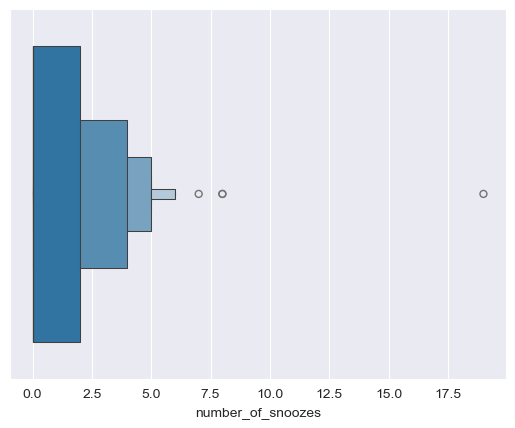

In [25]:
sns.boxenplot(df,x='number_of_snoozes');

In [26]:
df.number_of_snoozes.value_counts()

number_of_snoozes
0     3300
1     1229
2      693
4      427
5      345
3      309
6       59
8        2
19       1
7        1
Name: count, dtype: int64

In [27]:
df[df.number_of_snoozes >= 19]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
749,750,19,1.0,lightly active,5.0,19,3 stars


In [28]:
df = df[df.number_of_snoozes < 19]

In [29]:
df[df.isna().any(axis=1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


### Create new columns

In [30]:
df = pd.read_excel('/Users/AnirbanGuha/Library/CloudStorage/OneDrive-Personal/Udemy Courses/Data Science - data Prep and EDA with Python/Data+Science+in+Python+-+Data+Prep+%26+EDA/Data/Pen Sales Data.xlsx')

In [38]:
df

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,no
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,yes
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,no
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,no
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,no
5,5206,Gel Pens (Pastel),14.99,1.99,2023-05-01,2023-05-04,SmoothOperatorPen|This gel pen writes smoothly...,16.98,no
6,5207,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,InkStainedFingers|This pen is prone to leaking...,14.98,no
7,5208,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-07,"BoldInkWriter|Unfortunately, this pen has a te...",14.98,no
8,5209,Gel Pens,5.99,2.99,2023-05-01,2023-05-06,PenmanshipPro|The gel pen has a comfortable gr...,8.98,no
9,5210,Gel Pens (Pastel),14.99,4.99,2023-05-01,2023-05-02,GelPenGuru|This retractable gel pen has a fine...,19.98,no


In [32]:
df["Total Spend"] = df["Pen Cost"] + df["Shipping Cost"]

In [34]:
df["Shipping Cost"].value_counts()

Shipping Cost
1.99    9
2.99    7
0.00    6
4.99    3
Name: count, dtype: int64

In [35]:
df["Free Shipping"] = np.where(df["Shipping Cost"] == 0, "yes", "no")

In [37]:
df[df["Shipping Cost"] == 0].loc[:,["Shipping Cost", "Free Shipping"]]

,Shipping Cost,Free Shipping
1,0.0,yes
10,0.0,yes
15,0.0,yes
18,0.0,yes
19,0.0,yes
22,0.0,yes


### Creating DateTime Columns

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Customer       25 non-null     int64          
 1   Item           25 non-null     object         
 2   Pen Cost       25 non-null     float64        
 3   Shipping Cost  25 non-null     float64        
 4   Purchase Date  25 non-null     datetime64[ns] 
 5   Delivery Date  25 non-null     datetime64[ns] 
 6   Review         25 non-null     object         
 7   Total Spend    25 non-null     float64        
 8   Free Shipping  25 non-null     object         
 9   Delivery Time  25 non-null     timedelta64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(3), timedelta64[ns](1)
memory usage: 2.1+ KB


In [41]:
df["Delivery Time"] = df["Delivery Date"] - df["Purchase Date"]

In [43]:
df["Delivery Time"].mean()

Timedelta('3 days 05:45:36')

### Extracting Text

In [44]:
df.Review.head()

0    DoodleWithMe|I love the way this pen writes, b...
1    ScribbleMaster|The classic Sharpie marker has ...
2    PenPalForever|The retractable ballpoint pen ha...
3    TheWriteWay|This gel pen has a comfortable gri...
4    PenAndPaperPerson|The rollerball pen has a smo...
Name: Review, dtype: object

In [56]:
df[["User Name","Review Text"]] = df.Review.str.split(pat="|",expand=True,n=1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Customer       25 non-null     int64          
 1   Item           25 non-null     object         
 2   Pen Cost       25 non-null     float64        
 3   Shipping Cost  25 non-null     float64        
 4   Purchase Date  25 non-null     datetime64[ns] 
 5   Delivery Date  25 non-null     datetime64[ns] 
 6   Review         25 non-null     object         
 7   Total Spend    25 non-null     float64        
 8   Free Shipping  25 non-null     object         
 9   Delivery Time  25 non-null     timedelta64[ns]
 10  User Name      25 non-null     object         
 11  Review Text    25 non-null     object         
dtypes: datetime64[ns](2), float64(3), int64(1), object(5), timedelta64[ns](1)
memory usage: 2.5+ KB


In [59]:
df.drop(columns=["Review"],inplace=True)

In [60]:
df

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Total Spend,Free Shipping,Delivery Time,User Name,Review Text
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,8.98,no,2 days,DoodleWithMe,"I love the way this pen writes, but unfortunat..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,12.99,yes,3 days,ScribbleMaster,"The classic Sharpie marker has a bold, permane..."
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,11.94,no,1 days,PenPalForever,"The retractable ballpoint pen has a durable, m..."
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,8.98,no,3 days,TheWriteWay,This gel pen has a comfortable grip and writes...
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,14.98,no,2 days,PenAndPaperPerson,"The rollerball pen has a smooth, fluid feel an..."
5,5206,Gel Pens (Pastel),14.99,1.99,2023-05-01,2023-05-04,16.98,no,3 days,SmoothOperatorPen,"This gel pen writes smoothly with a bold, vibr..."
6,5207,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,14.98,no,2 days,InkStainedFingers,This pen is prone to leaking and can create a ...
7,5208,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-07,14.98,no,6 days,BoldInkWriter,"Unfortunately, this pen has a tendency to spil..."
8,5209,Gel Pens,5.99,2.99,2023-05-01,2023-05-06,8.98,no,5 days,PenmanshipPro,The gel pen has a comfortable grip and writes ...
9,5210,Gel Pens (Pastel),14.99,4.99,2023-05-01,2023-05-02,19.98,no,1 days,GelPenGuru,This retractable gel pen has a fine point that...


In [66]:
df["Leak or Spill"] = df["Review Text"].str.lower().str.contains("leak|spill",regex=True)

In [67]:
df

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Total Spend,Free Shipping,Delivery Time,User Name,Review Text,Leak or Spill
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,8.98,no,2 days,DoodleWithMe,"I love the way this pen writes, but unfortunat...",True
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,12.99,yes,3 days,ScribbleMaster,"The classic Sharpie marker has a bold, permane...",False
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,11.94,no,1 days,PenPalForever,"The retractable ballpoint pen has a durable, m...",False
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,8.98,no,3 days,TheWriteWay,This gel pen has a comfortable grip and writes...,False
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,14.98,no,2 days,PenAndPaperPerson,"The rollerball pen has a smooth, fluid feel an...",False
5,5206,Gel Pens (Pastel),14.99,1.99,2023-05-01,2023-05-04,16.98,no,3 days,SmoothOperatorPen,"This gel pen writes smoothly with a bold, vibr...",False
6,5207,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,14.98,no,2 days,InkStainedFingers,This pen is prone to leaking and can create a ...,True
7,5208,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-07,14.98,no,6 days,BoldInkWriter,"Unfortunately, this pen has a tendency to spil...",True
8,5209,Gel Pens,5.99,2.99,2023-05-01,2023-05-06,8.98,no,5 days,PenmanshipPro,The gel pen has a comfortable grip and writes ...,False
9,5210,Gel Pens (Pastel),14.99,4.99,2023-05-01,2023-05-02,19.98,no,1 days,GelPenGuru,This retractable gel pen has a fine point that...,False


In [68]:
df.to_pickle("Pen_Sales_Data.pkl")